In [1]:
import pandas as pd
housing= pd.read_csv("https://media.geeksforgeeks.org/wp-content/uploads/20240319120216/housing.csv")
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


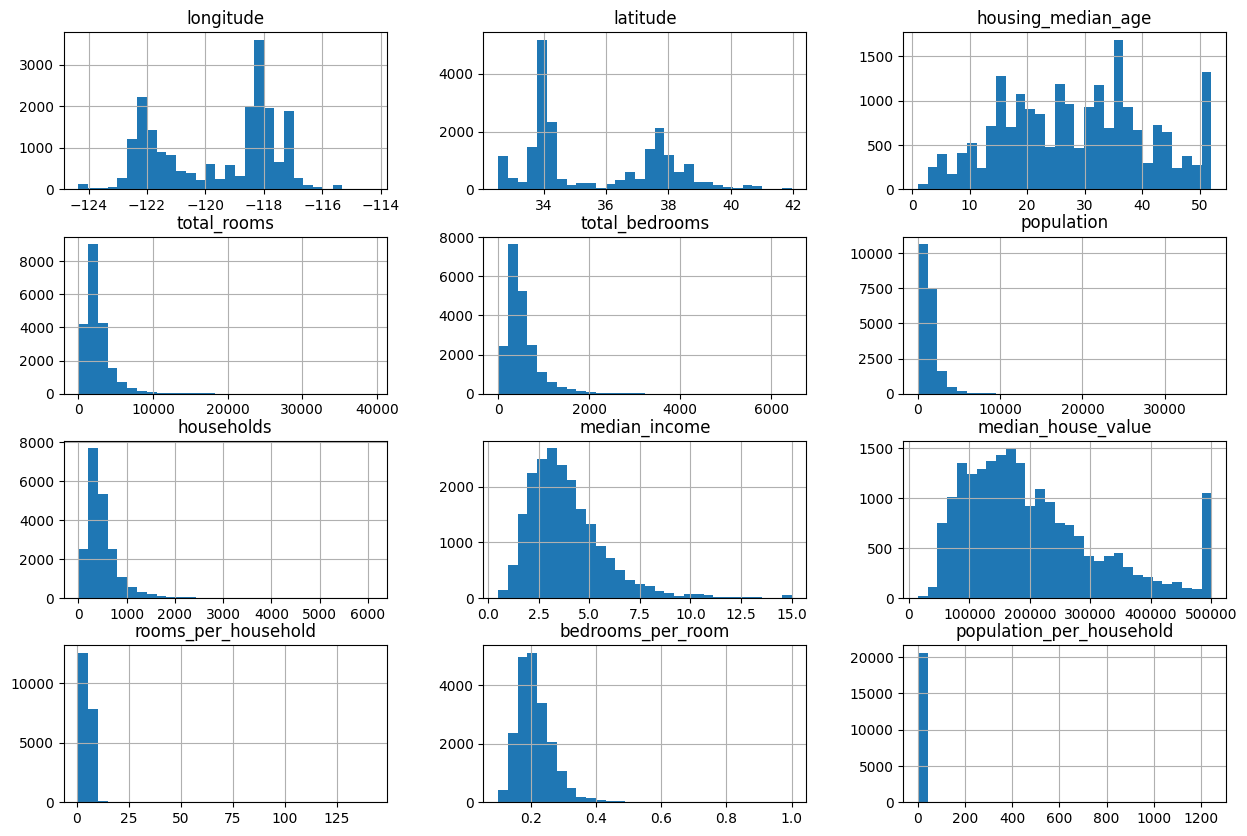

In [18]:
import matplotlib.pyplot as plt

housing.hist(bins=30, figsize=(15,10))
plt.show()


In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0.,1.5,3.0,4.5,6.,float('inf')],
    labels=[1,2,3,4,5]
)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_idx]
    strat_test_set = housing.loc[test_idx]

housing.drop("income_cat", axis=1, inplace=True)


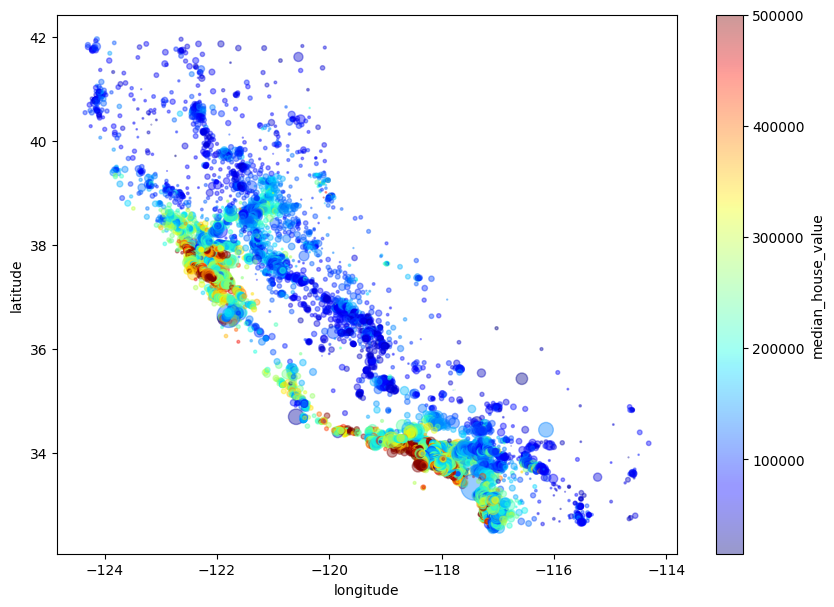

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude",
             alpha=0.4,
             s=housing["population"]/100,
             c="median_house_value",
             cmap=plt.get_cmap("jet"),
             colorbar=True,
             figsize=(10,7))
plt.show()


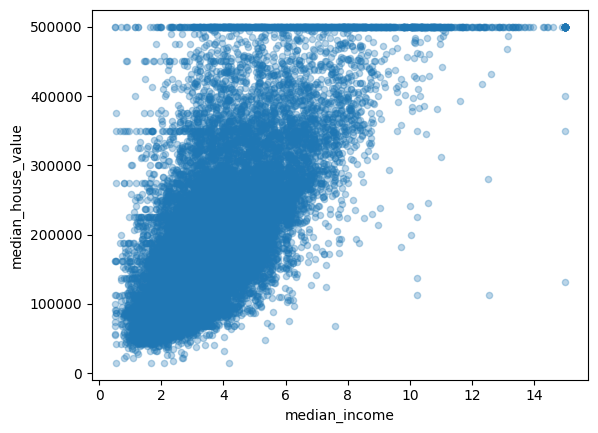

In [23]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.3)
plt.show()



In [25]:
corr_matrix = housing.corr(numeric_only=True)
print(corr_matrix["median_house_value"].sort_values(ascending=False))



median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64


In [26]:
print(housing.isnull().sum())


longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64


In [27]:
from sklearn.impute import SimpleImputer

housing_num = housing.drop("ocean_proximity", axis=1)
imputer = SimpleImputer(strategy="median")
housing_num_clean = imputer.fit_transform(housing_num)


In [28]:
from sklearn.preprocessing import OneHotEncoder

housing_cat = housing[["ocean_proximity"]]
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat)

print(housing_cat_1hot.toarray())


[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_num_clean)


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared.shape)


(20640, 17)
